In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ultimate-spotify-tracks-db/SpotifyFeatures.csv


In [2]:
df = pd.read_csv("/kaggle/input/ultimate-spotify-tracks-db/SpotifyFeatures.csv")
df.sample(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
96265,Indie,Pulp,Common People,2fXKyAyPrEa24c6PJyqznF,69,0.00562,0.323,351693,0.803,0.000059,C,0.0730,-9.034,Major,0.0408,144.271,4/4,0.5400
126909,Classical,Jacques Offenbach,Gaîté parisienne: No. 23: Barcarolle,3q4Y3PqfJUFCIxaSA0H0Aa,37,0.85100,0.203,226387,0.104,0.025500,D,0.2790,-22.281,Major,0.0320,100.780,4/4,0.1280
68102,Hip-Hop,6LACK,Loaded Gun,1wb7Mqon4o1ViLjaLV9f8U,67,0.11300,0.643,198442,0.545,0.000018,C#,0.1240,-6.526,Minor,0.0895,128.023,4/4,0.2860
89195,Hip-Hop,Future,I Serve the Base,1Rq4GtIucW9CAcF8B6PAbW,53,0.01100,0.636,190893,0.570,0.002040,C#,0.0677,-5.973,Major,0.0571,168.202,4/4,0.0883
188792,Ska,Desmond Dekker,Wiseman,5b7kOclhcIBBTaXKFsEjL1,23,0.33300,0.787,136653,0.485,0.000003,C,0.1580,-9.659,Major,0.0280,98.627,4/4,0.9600


In [3]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [4]:
df.isna().sum()

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [5]:
df.genre.value_counts()

genre
Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: count, dtype: int64

In [6]:
df.duration_ms.describe()

count    2.327250e+05
mean     2.351223e+05
std      1.189359e+05
min      1.538700e+04
25%      1.828570e+05
50%      2.204270e+05
75%      2.657680e+05
max      5.552917e+06
Name: duration_ms, dtype: float64

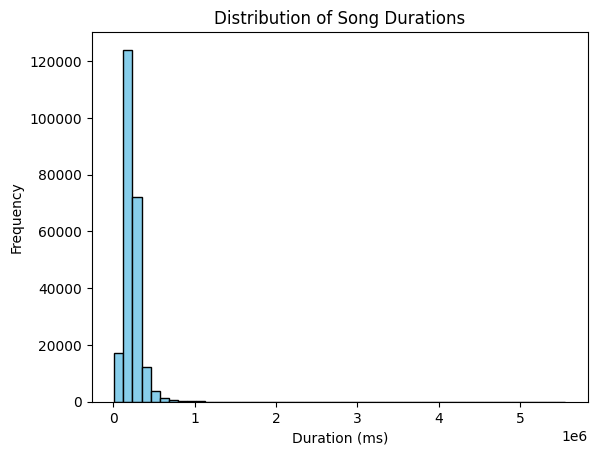

In [7]:
plt.hist(df['duration_ms'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel("Duration (ms)")
plt.ylabel("Frequency")
plt.title("Distribution of Song Durations")
plt.show()


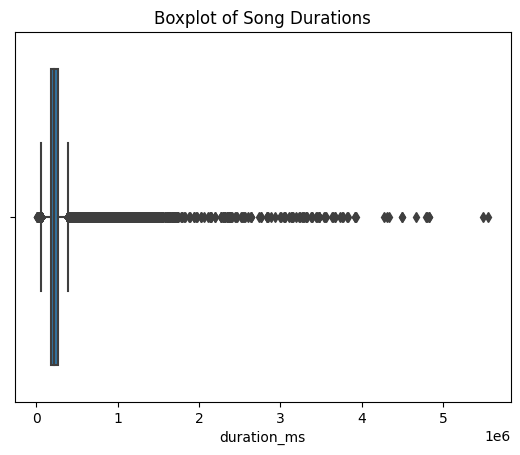

In [8]:
sns.boxplot(x=df['duration_ms'])
plt.title("Boxplot of Song Durations")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


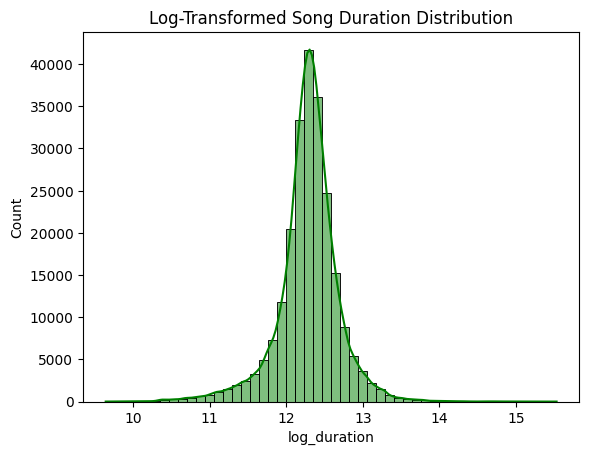

In [9]:
df['log_duration'] = np.log1p(df['duration_ms'])

sns.histplot(df['log_duration'], bins=50, kde=True, color="green")
plt.title("Log-Transformed Song Duration Distribution")
plt.show()

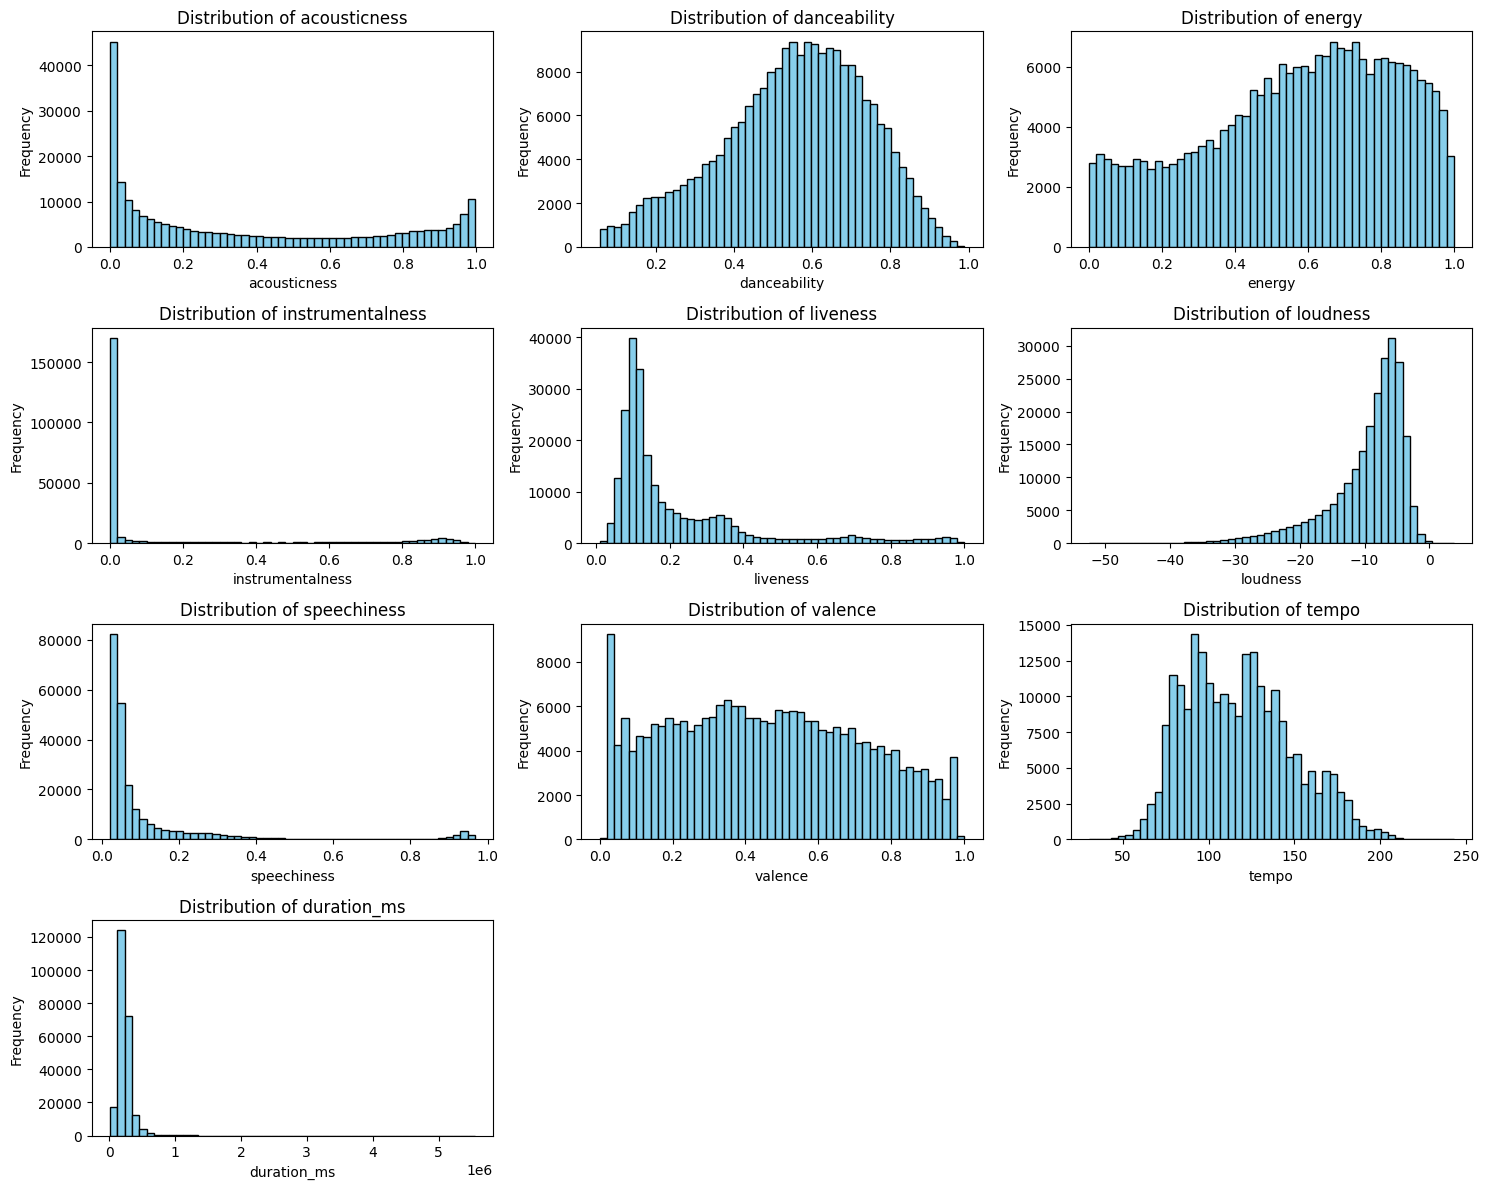

In [10]:
features = [
    'acousticness', 'danceability', 'energy', 'instrumentalness',
    'liveness', 'loudness', 'speechiness', 'valence', 'tempo', 'duration_ms'
]

plt.figure(figsize=(15, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)
    plt.hist(df[feature], bins=50, color='skyblue', edgecolor='black')
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()


In [11]:
df['dance_bin'] = pd.cut(df['danceability'], bins=[0,0.33,0.66,1], labels=['Low','Medium','High'])
df['valence_bin'] = pd.cut(df['valence'], bins=[0,0.33,0.66,1], labels=['Sad','Neutral','Happy'])
bt = pd.crosstab(df['dance_bin'], df['valence_bin'])
print(bt)

valence_bin    Sad  Neutral  Happy
dance_bin                         
Low          26001     4080    677
Medium       46045    57599  25736
High         11081    29802  31672


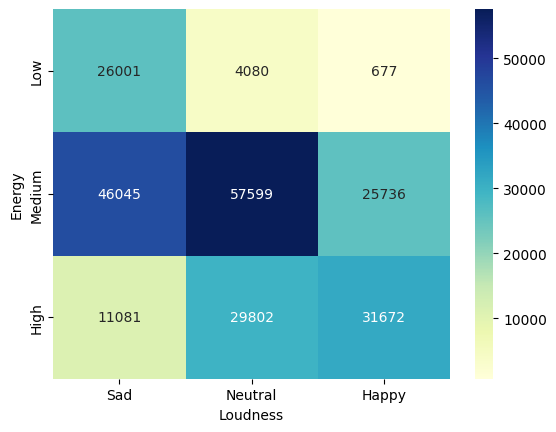

In [12]:
sns.heatmap(bt, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.show()

In [13]:
df['energy_bin'] = pd.cut(df['energy'], bins=[0,0.33,0.66,1], labels=['Low','Medium','High'])
df['loudness_bin'] = pd.cut(df['loudness'], bins=[-60,-30,-10,0], labels=['Quiet','Moderate','Loud'])
ct = pd.crosstab(df['energy_bin'], df['loudness_bin'])
print(ct)

loudness_bin  Quiet  Moderate   Loud
energy_bin                          
Low            2511     42437   3254
Medium            0     27759  57751
High              0      5275  93647


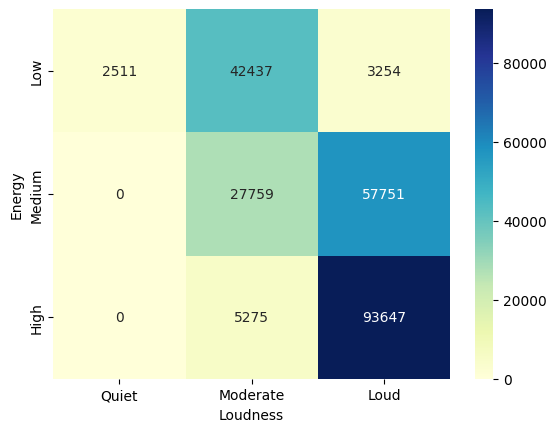

In [14]:
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Movie'),
  Text(1, 0, 'R&B'),
  Text(2, 0, 'A Capella'),
  Text(3, 0, 'Alternative'),
  Text(4, 0, 'Country'),
  Text(5, 0, 'Dance'),
  Text(6, 0, 'Electronic'),
  Text(7, 0, 'Anime'),
  Text(8, 0, 'Folk'),
  Text(9, 0, 'Blues'),
  Text(10, 0, 'Opera'),
  Text(11, 0, 'Hip-Hop'),
  Text(12, 0, "Children's Music"),
  Text(13, 0, 'Children’s Music'),
  Text(14, 0, 'Rap'),
  Text(15, 0, 'Indie'),
  Text(16, 0, 'Classical'),
  Text(17, 0, 'Pop'),
  Text(18, 0, 'Reggae'),
  Text(19, 0, 'Reggaeton'),
  Text(20, 0, 'Jazz'),
  Text(21, 0, 'Rock'),
  Text(22, 0, 'Ska'),
  Text(23, 0, 'Comedy'),
  Text(24, 0, 'Soul'),
  Text(25, 0, 'Soundtrack'),
  Text(26, 0, 'World')])

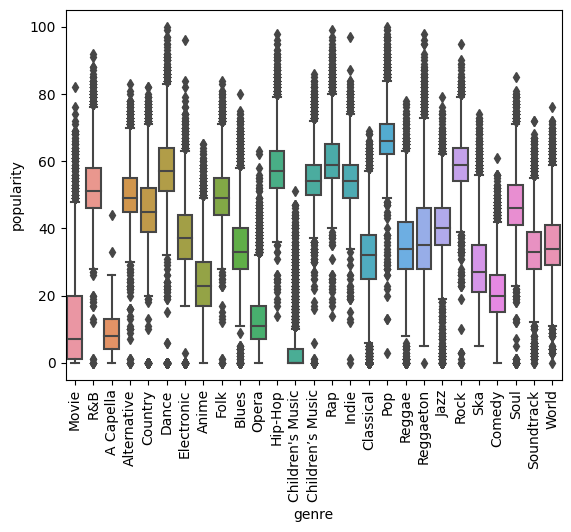

In [15]:
sns.boxplot(x='genre', y='popularity', data=df)
plt.xticks(rotation=90)